In [1]:
import cv2
import numpy as np

import my_helper as helper

# Image Descriptors

We can detect the main feature of an image and extract them into so-called image descriptors.


## Detecting the Harris corners

1. It detect the corner in the image.
2. Since corner produce the significate change in intensity as we slide the window over the kernel.

[For More Details](https://theailearner.com/2021/09/25/harris-corner-detection/)

In [2]:
helper.download_image("https://images.chesscomfiles.com/uploads/v1/images_users/tiny_mce/CHESScom/phpRtYx9j.png",
                      "chess")

[INFO] downloading image and saving to ../images/chess.jpg


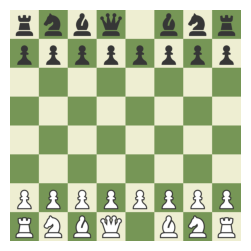

In [3]:
img = cv2.imread("../images/chess.jpg")
helper.plot_img(img)

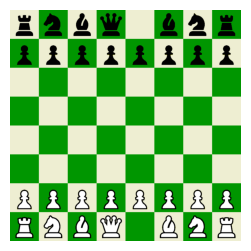

In [4]:
_,thresh = cv2.threshold(img,thresh=127,maxval=255,type=cv2.THRESH_TOZERO)
helper.plot_img(thresh)

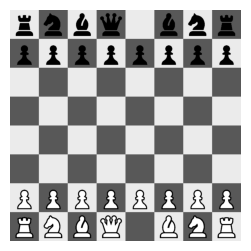

In [5]:
gray_img = cv2.cvtColor(thresh,cv2.COLOR_BGR2GRAY)
helper.plot_img(gray_img)

In [6]:
help(cv2.cornerHarris)

Help on built-in function cornerHarris:

cornerHarris(...)
    cornerHarris(src, blockSize, ksize, k[, dst[, borderType]]) -> dst
    .   @brief Harris corner detector.
    .   
    .   The function runs the Harris corner detector on the image. Similarly to cornerMinEigenVal and
    .   cornerEigenValsAndVecs , for each pixel \f$(x, y)\f$ it calculates a \f$2\times2\f$ gradient covariance
    .   matrix \f$M^{(x,y)}\f$ over a \f$\texttt{blockSize} \times \texttt{blockSize}\f$ neighborhood. Then, it
    .   computes the following characteristic:
    .   
    .   \f[\texttt{dst} (x,y) =  \mathrm{det} M^{(x,y)} - k  \cdot \left ( \mathrm{tr} M^{(x,y)} \right )^2\f]
    .   
    .   Corners in the image can be found as the local maxima of this response map.
    .   
    .   @param src Input single-channel 8-bit or floating-point image.
    .   @param dst Image to store the Harris detector responses. It has the type CV_32FC1 and the same
    .   size as src .
    .   @param blockSize Neighb

In [7]:
dst = cv2.cornerHarris(src=gray_img,
                       blockSize=2,
                       ksize=23,
                       k=0.01)

# src - Input single-channel 8-bit or floating-point image.
# blockSize - Neighborhood size used when computing the matrix M.
#? ksize - Aperture parameter for the Sobel operator. value range 3 - 31 and odd values
#? low value means -- more regress in finding the corner
#? high value means - vice versa 
# k - Harris detector free parameter in the score equation.

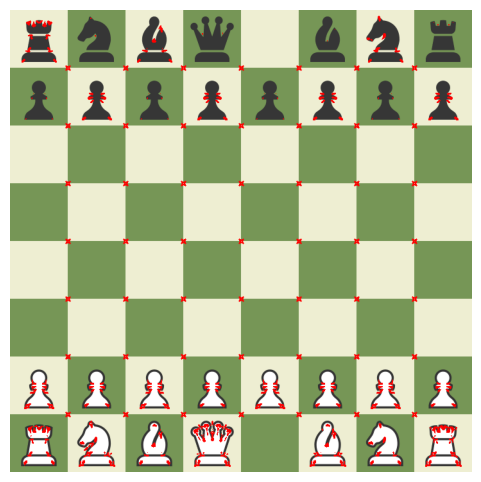

In [8]:
# moderate or high score indicate the corner in the image
thresh =  0.01 * dst.max()
img[dst > thresh] = [0,0,255]
helper.plot_img(img,figsize=(6,6))

In [50]:
def detect_corner_using_harris(img_path,ksize,k=0.01,corner_percent=0.01,figsize=(6,6)):
    # read the image
    img = cv2.imread(img_path)
    _,thresh = cv2.threshold(img,thresh=127,maxval=255,type=cv2.THRESH_TOZERO)
    # helper.plot_img(thresh)
    # convert into gray image
    gray_img = cv2.cvtColor(thresh,cv2.COLOR_BGR2GRAY)
    
    # detect the corner using the harris
    dst = cv2.cornerHarris(src=gray_img,
                           blockSize=2,
                           ksize=ksize,
                           k=k)
    thresh = corner_percent * dst.max()
    img[dst > thresh] = [255,0,0]
    helper.plot_img(img,figsize=figsize)

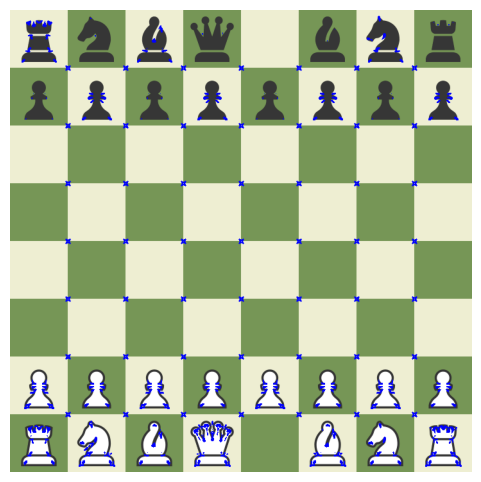

In [51]:
detect_corner_using_harris("../images/chess.jpg",ksize=23)

In [52]:
helper.download_image("https://live.planetf1.com/Content/Images/Circuits/CircuitsDetail/24.png",
                      "track")

[INFO] downloading image and saving to ../images/track.jpg


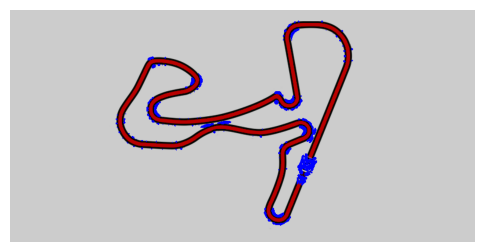

In [69]:
detect_corner_using_harris("../images/track.jpg",ksize=23,k=0.0001)

In [13]:
helper.download_image("https://2.bp.blogspot.com/-cnYt_FyJCzE/W30mABCisgI/AAAAAAAABrs/4lktbWjgdB0iUQeoYgJBSYZ8ACBtBz46QCK4BGAYYCw/s1600/Sample%2BFmb.png",
                      "fmb")

[INFO] downloading image and saving to ../images/fmb.jpg


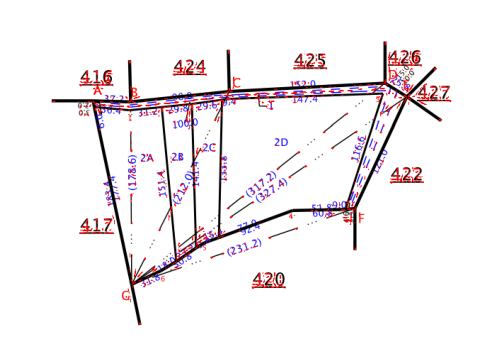

In [14]:
detect_corner_using_harris("../images/fmb.jpg",ksize=23,k=0.04)

 For detecting corners has a distinct advantage because corners are corners; they are detected even if the image is rotated. 
 However, if we scale an image to a smaller or larger size, some parts of the image may lose or even gain a corner quality

In [72]:
def detect_corner_using_harris(img_path,ksize,k=0.01,corner_percent=0.01,figsize=(6,6),scale=1.0):
    # read the image
    img = cv2.imread(img_path)
    print(f"original shape {img.shape}")
    img = cv2.resize(img,[int(i*scale) for i in reversed(img.shape[:2])])
    print(f"resize shape {img.shape}")
    _,thresh = cv2.threshold(img,thresh=127,maxval=255,type=cv2.THRESH_TOZERO)
    # helper.plot_img(thresh)
    # convert into gray image
    gray_img = cv2.cvtColor(thresh,cv2.COLOR_BGR2GRAY)
    
    # detect the corner using the harris
    dst = cv2.cornerHarris(src=gray_img,
                           blockSize=2,
                           ksize=ksize,
                           k=k)
    thresh = corner_percent * dst.max()
    img[dst > thresh] = [255,0,0]
    helper.plot_img(img,figsize=figsize)

original shape (400, 801, 3)
resize shape (400, 801, 3)


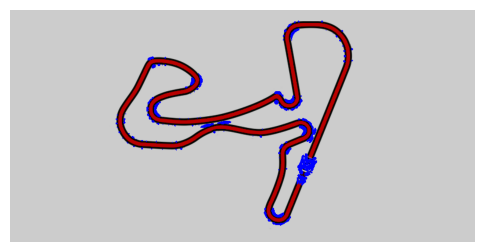

In [73]:
detect_corner_using_harris("../images/track.jpg",ksize=23,k=0.0001,scale=1)

original shape (400, 801, 3)
resize shape (120, 240, 3)


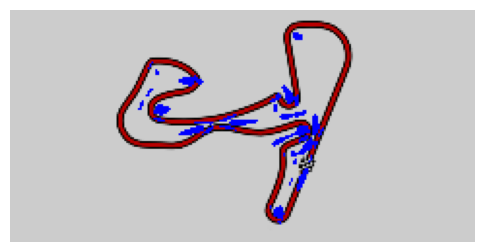

In [74]:
detect_corner_using_harris("../images/track.jpg",ksize=23,scale=0.3)
#? increase  the corner

original shape (400, 801, 3)
resize shape (720, 1441, 3)


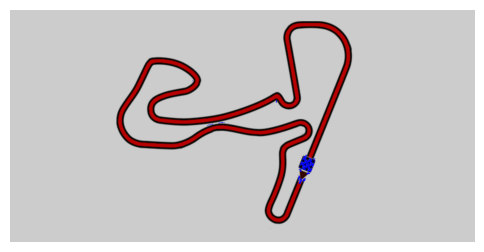

In [75]:
detect_corner_using_harris("../images/track.jpg",ksize=23,scale=1.8)
#? decrease the corner

## DoG and SIFT

1. Due the scale variance we loss the key feature in above image, to avoid the loss of feature.SIFT is introduced.
2. SIFT does not detect the keypoints which is done by the DoG(Difference of Gaussian blur)
3. Instead it describe teh region surrounding them as feature vector.

> What is DoG?
> 
> 1. Take two Gaussian kernel with different std,apply on the same image then subtract them we will have DoG. 

[Refer More](https://theailearner.com/2019/05/13/difference-of-gaussians-dog/)


In [87]:
helper.download_image("https://i.pinimg.com/originals/4e/9a/53/4e9a5309bf951105f3994abfd6268210.jpg",
                      "varsee")

[INFO] downloading image and saving to ../images/varsee.jpg


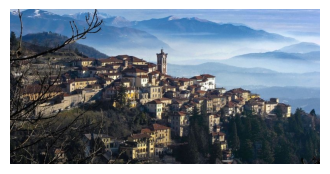

In [88]:
img = cv2.imread("../images/varsee.jpg")
helper.plot_img(img)

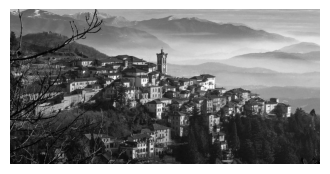

In [89]:
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
helper.plot_img(gray_img)

In [91]:
sift = cv2.xfeatures2d.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray_img, None)


In [95]:
type(keypoints[0])

cv2.KeyPoint

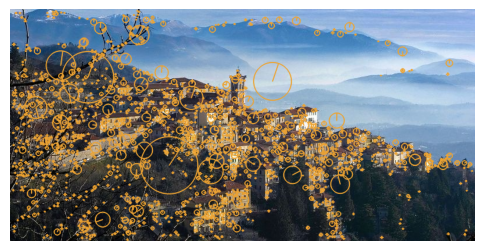

In [97]:
cv2.drawKeypoints(image=img,
                  keypoints=keypoints,
                  outImage=img,
                  color=(51,163,236),
                  flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
helper.plot_img(img,figsize=(6,6))
